In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

下一行：`unsqueeze`用来将一维数据改成二维的数据，`pytorth`只能接受二维的。

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

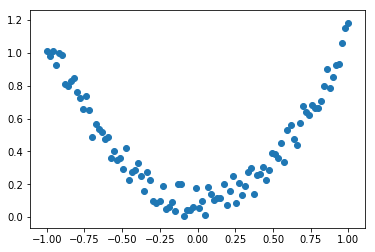

In [3]:
# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(RegressionNet, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)     
        return x

In [5]:
net = RegressionNet(1,10,1)
print(net)

RegressionNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # 均方差

In [23]:
for t in range(10000):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 1000 == 0:
        print(loss.data.numpy())

0.0038387964
0.0038387964
0.0038387964
0.0038387964
0.0038387964
0.0038387964
0.0038387964
0.0038387964
0.0038387964
0.0038387964
